In [ ]:
from tools import *
import pandas as pd
train = pd.read_csv('../input/train.csv')
training_extra = pd.read_csv('../input/training_extra.csv')
test = pd.read_csv('../input/test.csv')

In [ ]:
print('-' * 20, 'train', '-'*20)
data_overview(train, head=False, describe=False)
# print('-' * 20, 'training_extra', '-'*20)
# data_overview(training_extra)
print('-' * 20, 'test', '-'*20)
data_overview(test, head=False, describe=False)

-------------------- train --------------------


,Missing Count,Missing(%),Unique_counts,Unique_values,Dtype
id,0,0.0,300000,Much,int64
Brand,9705,3.2,5,"[Jansport, Under Armour, Nike, Adidas, Puma, nan]",object
Material,8347,2.8,4,"[Leather, Canvas, Nylon, nan, Polyester]",object
Size,6595,2.2,3,"[Medium, Small, Large, nan]",object
Compartments,0,0.0,10,"[7.0, 10.0, 2.0, 8.0, 1.0, 3.0, 5.0, 9.0, 6.0,...",float64
Laptop Compartment,7444,2.5,2,"[Yes, No, nan]",object
Waterproof,7050,2.4,2,"[No, Yes, nan]",object
Style,7970,2.7,3,"[Tote, Messenger, nan, Backpack]",object
Color,9950,3.3,6,"[Black, Green, Red, Blue, Gray, Pink, nan]",object
Weight Capacity (kg),138,0.0,181596,Much,float64


No duplicate rows found
-------------------- test --------------------


,Missing Count,Missing(%),Unique_counts,Unique_values,Dtype
id,0,0.0,200000,Much,int64
Brand,6227,3.1,5,"[Puma, Nike, Adidas, nan, Under Armour, Jansport]",object
Material,5613,2.8,4,"[Leather, Canvas, Nylon, Polyester, nan]",object
Size,4381,2.2,3,"[Small, Medium, Large, nan]",object
Compartments,0,0.0,10,"[2.0, 7.0, 9.0, 1.0, 8.0, 6.0, 5.0, 3.0, 10.0,...",float64
Laptop Compartment,4962,2.5,2,"[No, Yes, nan]",object
Waterproof,4811,2.4,2,"[No, Yes, nan]",object
Style,5153,2.6,3,"[Tote, Backpack, Messenger, nan]",object
Color,6785,3.4,6,"[Green, Blue, Black, Red, Pink, Gray, nan]",object
Weight Capacity (kg),77,0.0,128897,Much,float64


No duplicate rows found


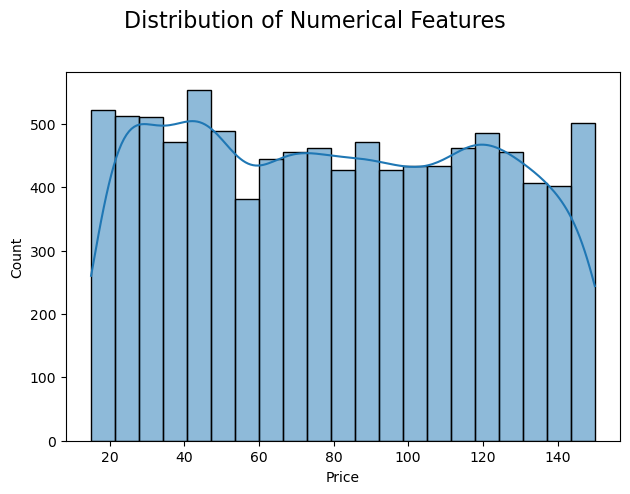

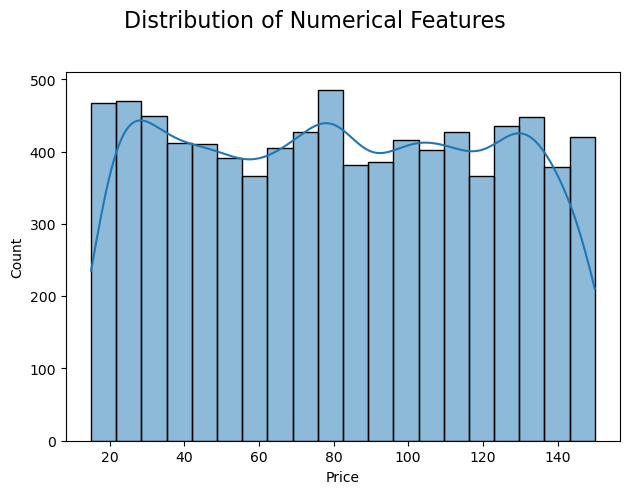

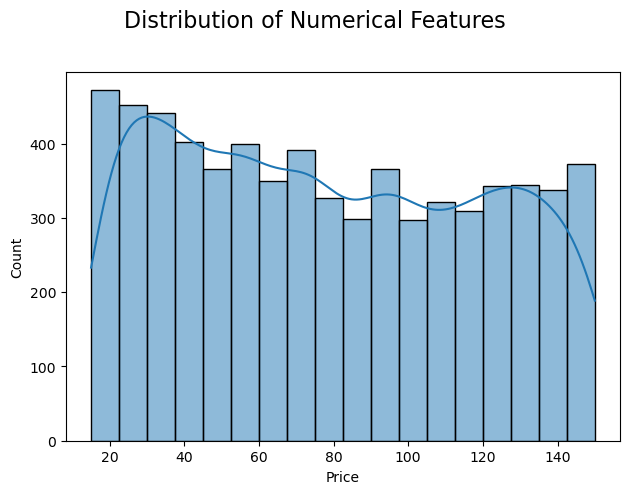

In [10]:
plot_distribution(train[train['Brand'].isna()], ['Price'], 'num')
plot_distribution(train[train['Material'].isna()], ['Price'], 'num')
plot_distribution(train[train['Size'].isna()], ['Price'], 'num')


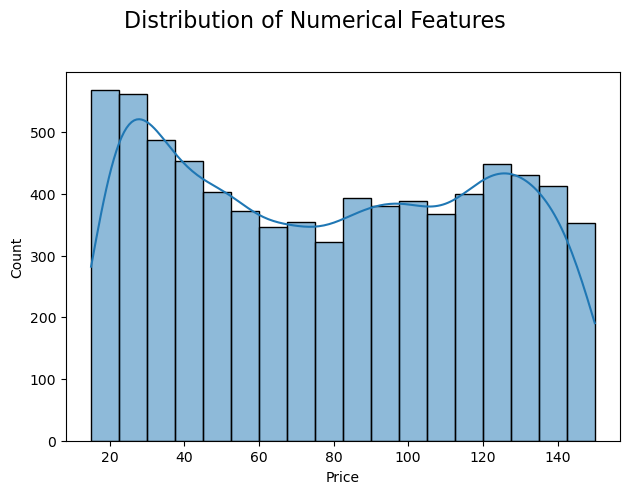

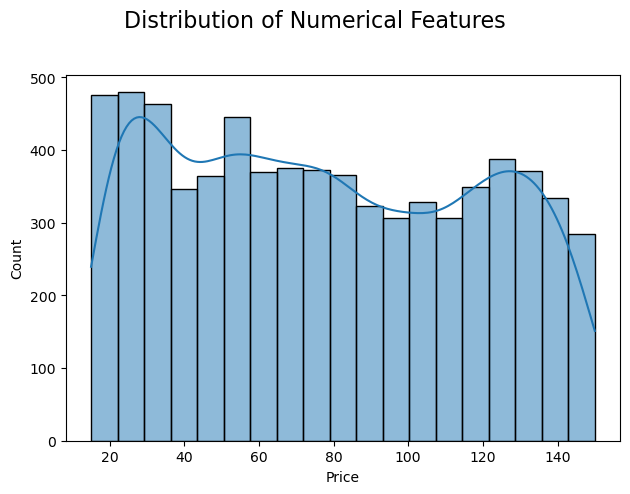

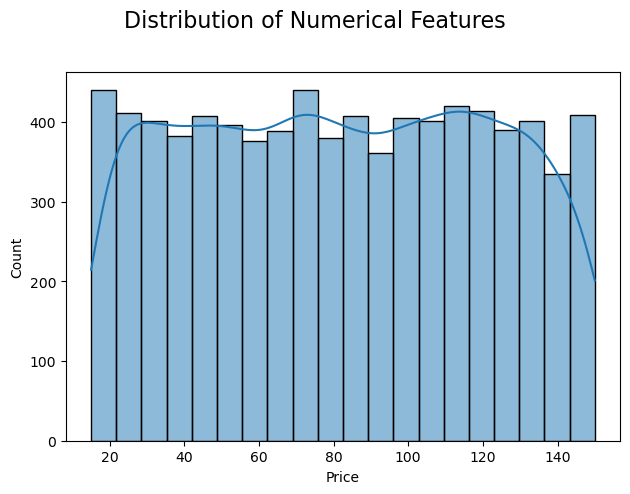

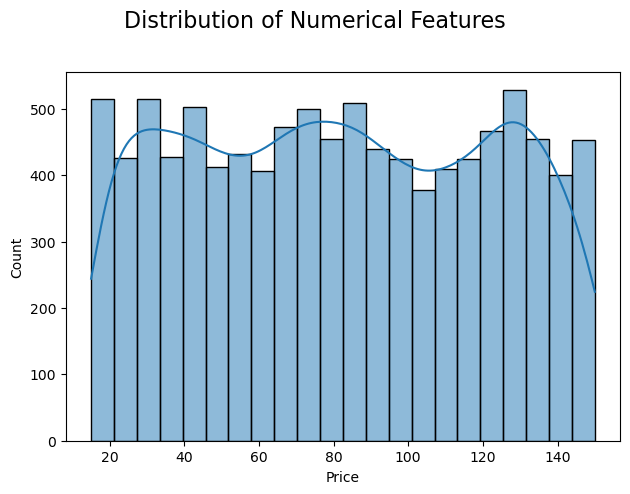

In [11]:
plot_distribution(train[train['Laptop Compartment'].isna()], ['Price'], 'num')
plot_distribution(train[train['Waterproof'].isna()], ['Price'], 'num')
plot_distribution(train[train['Style'].isna()], ['Price'], 'num')
plot_distribution(train[train['Color'].isna()], ['Price'], 'num')

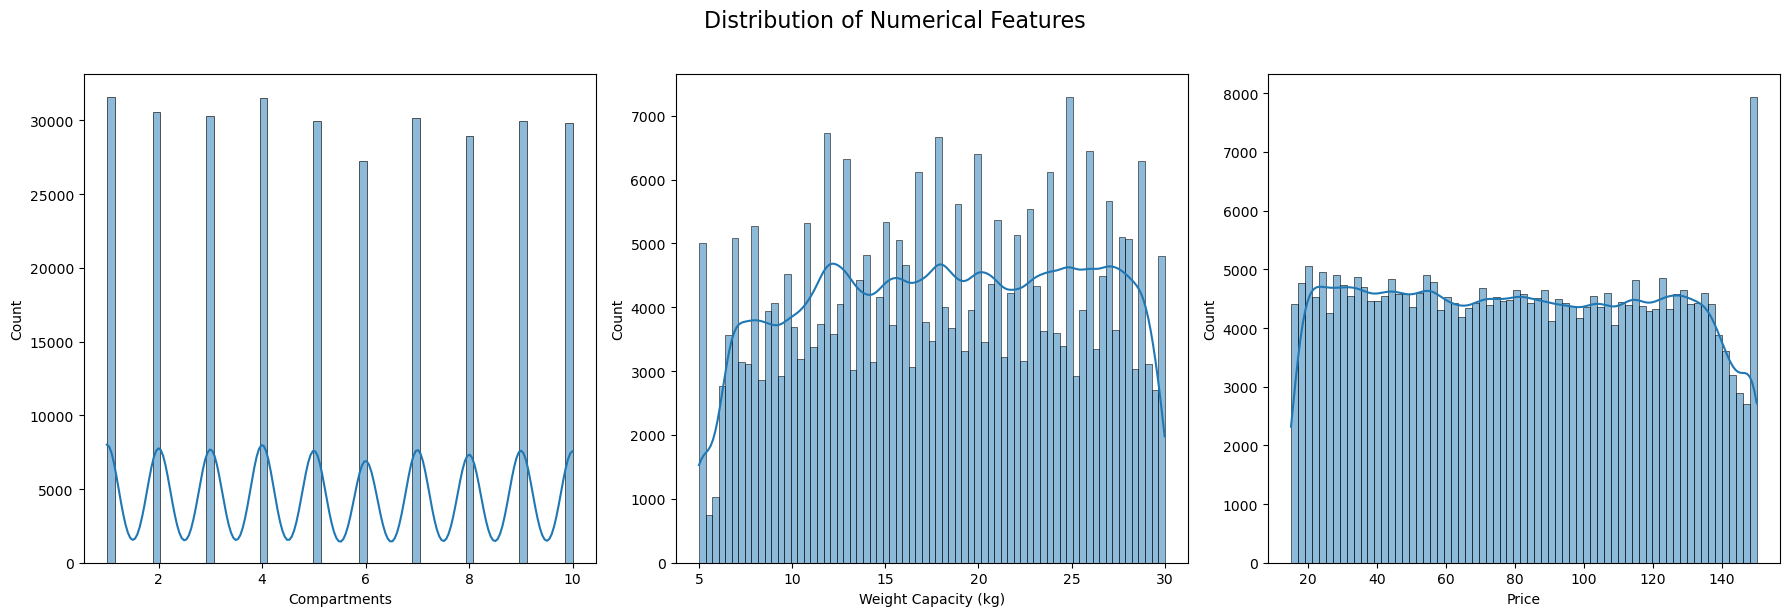

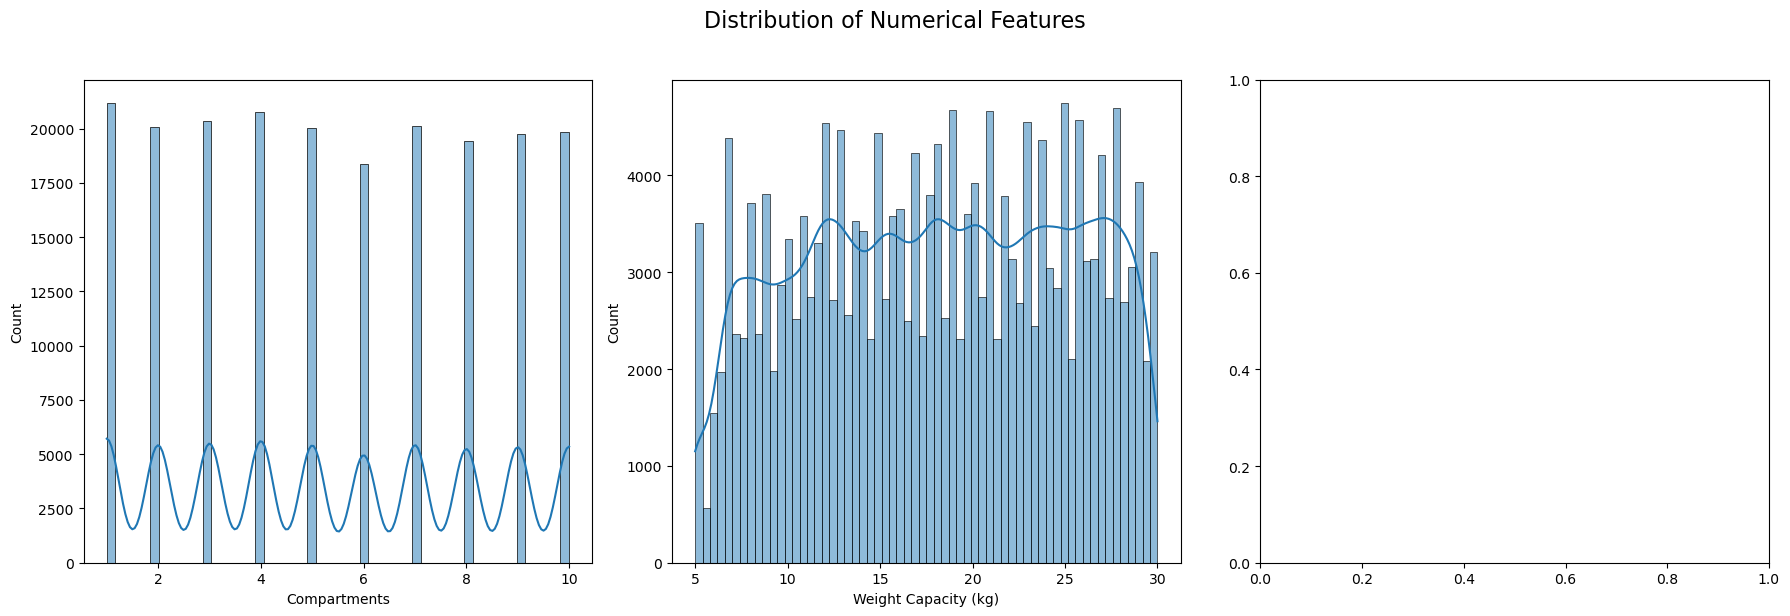

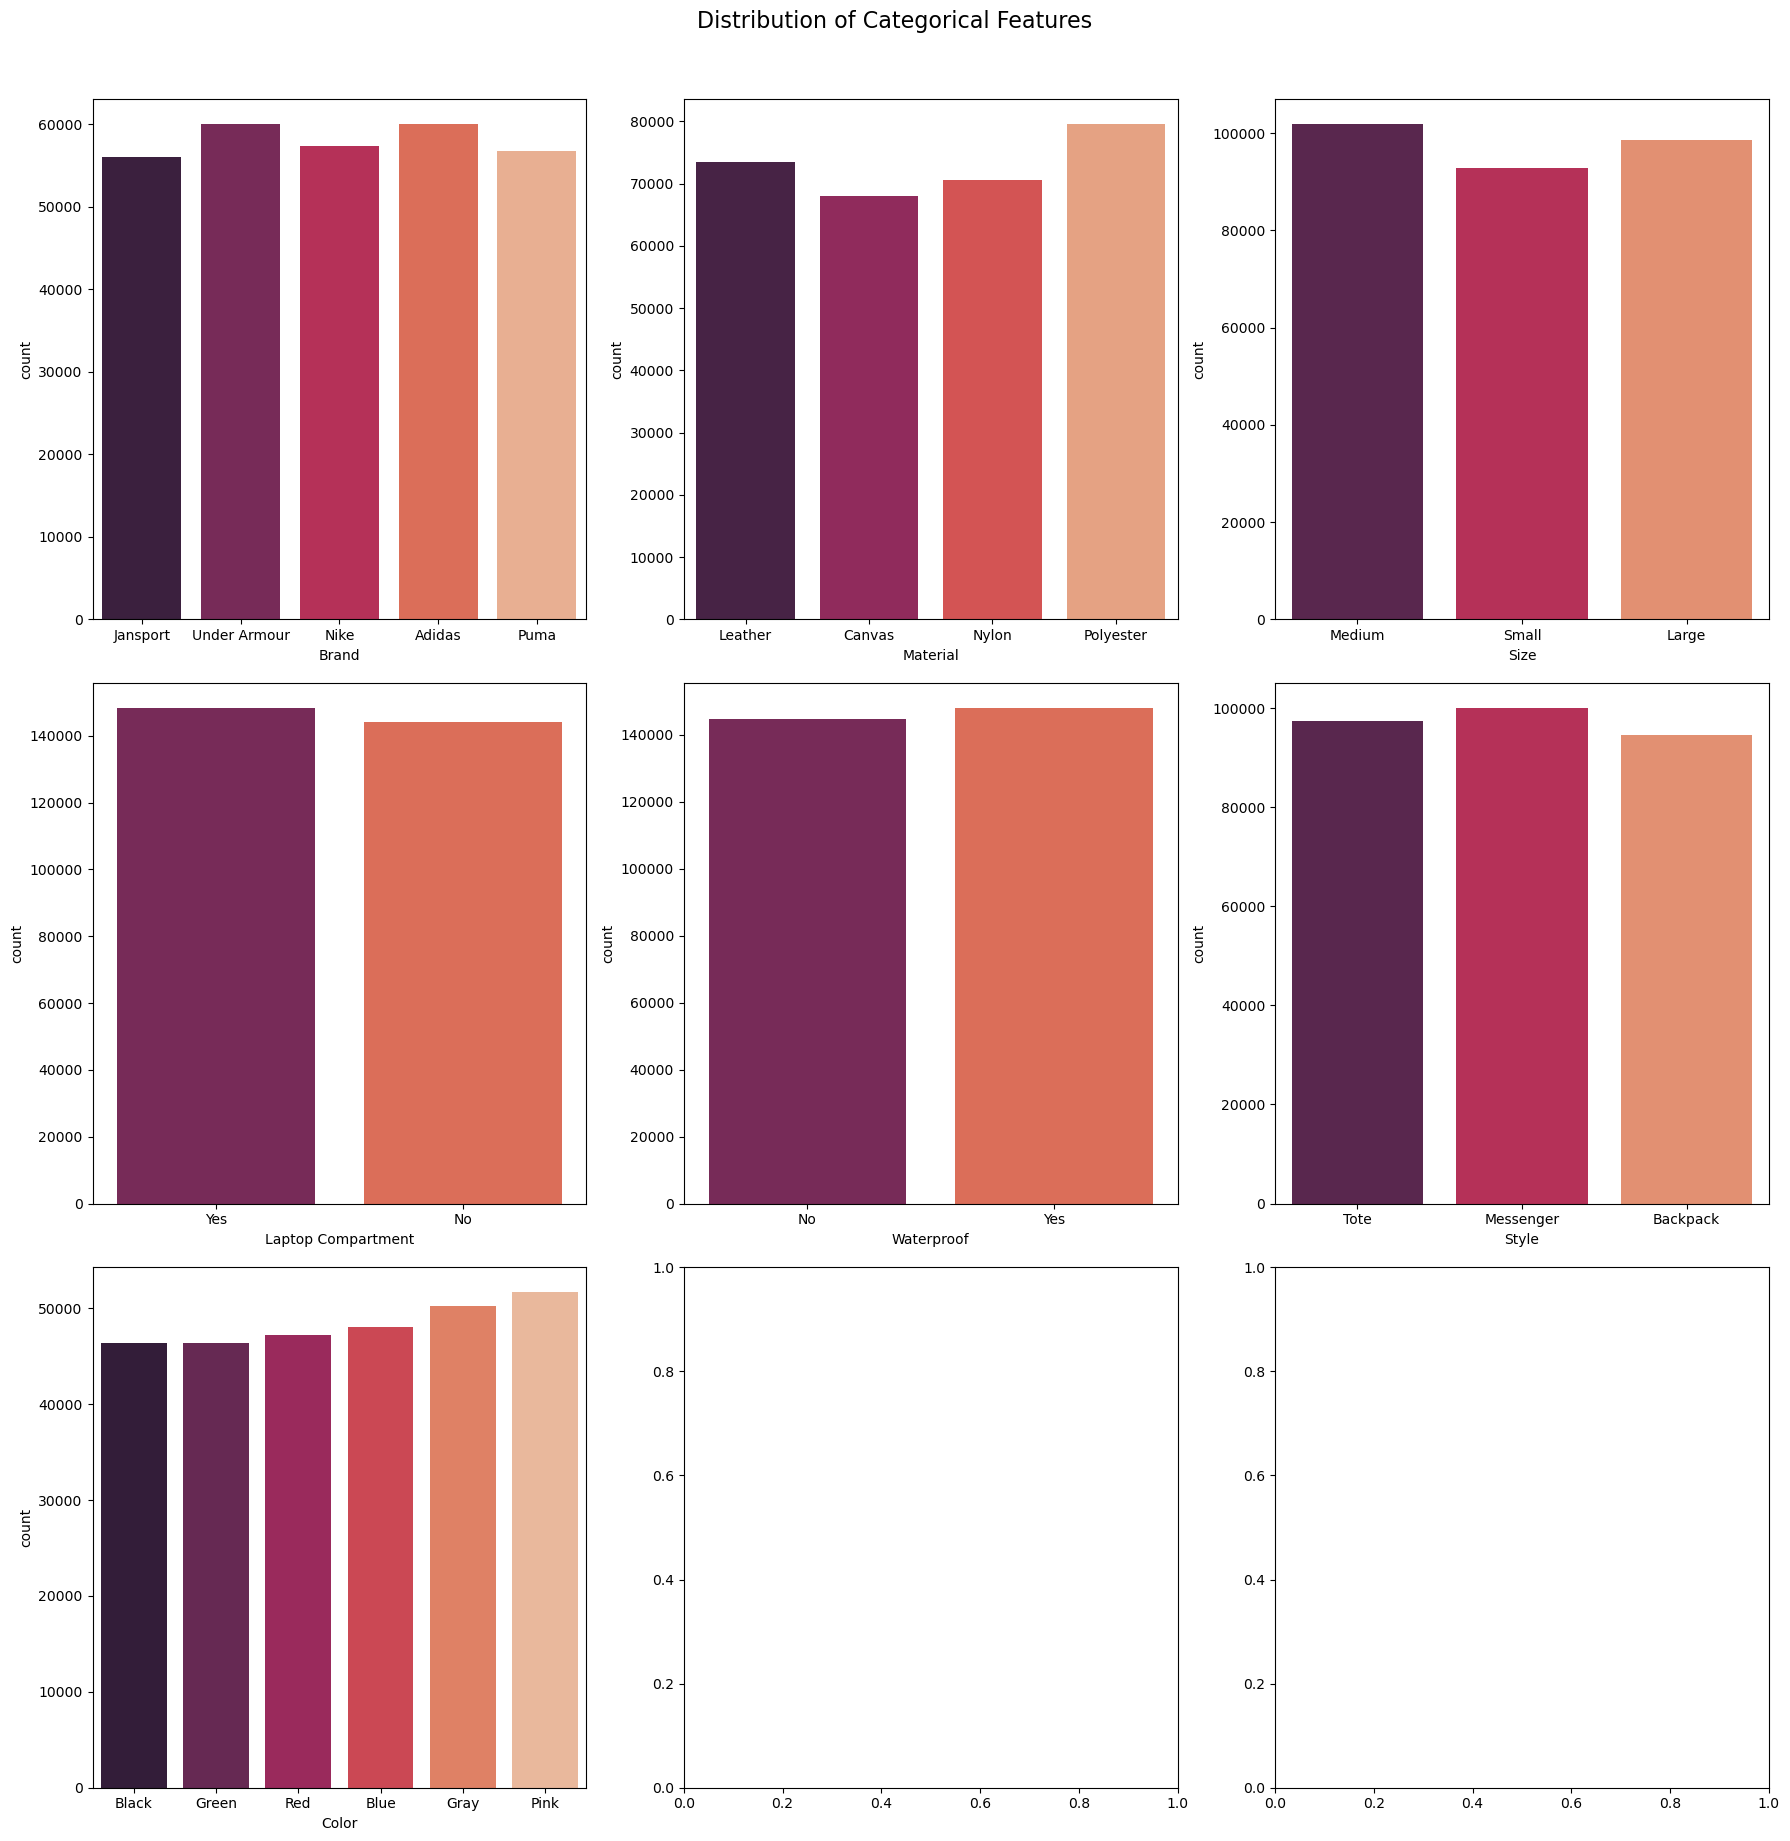

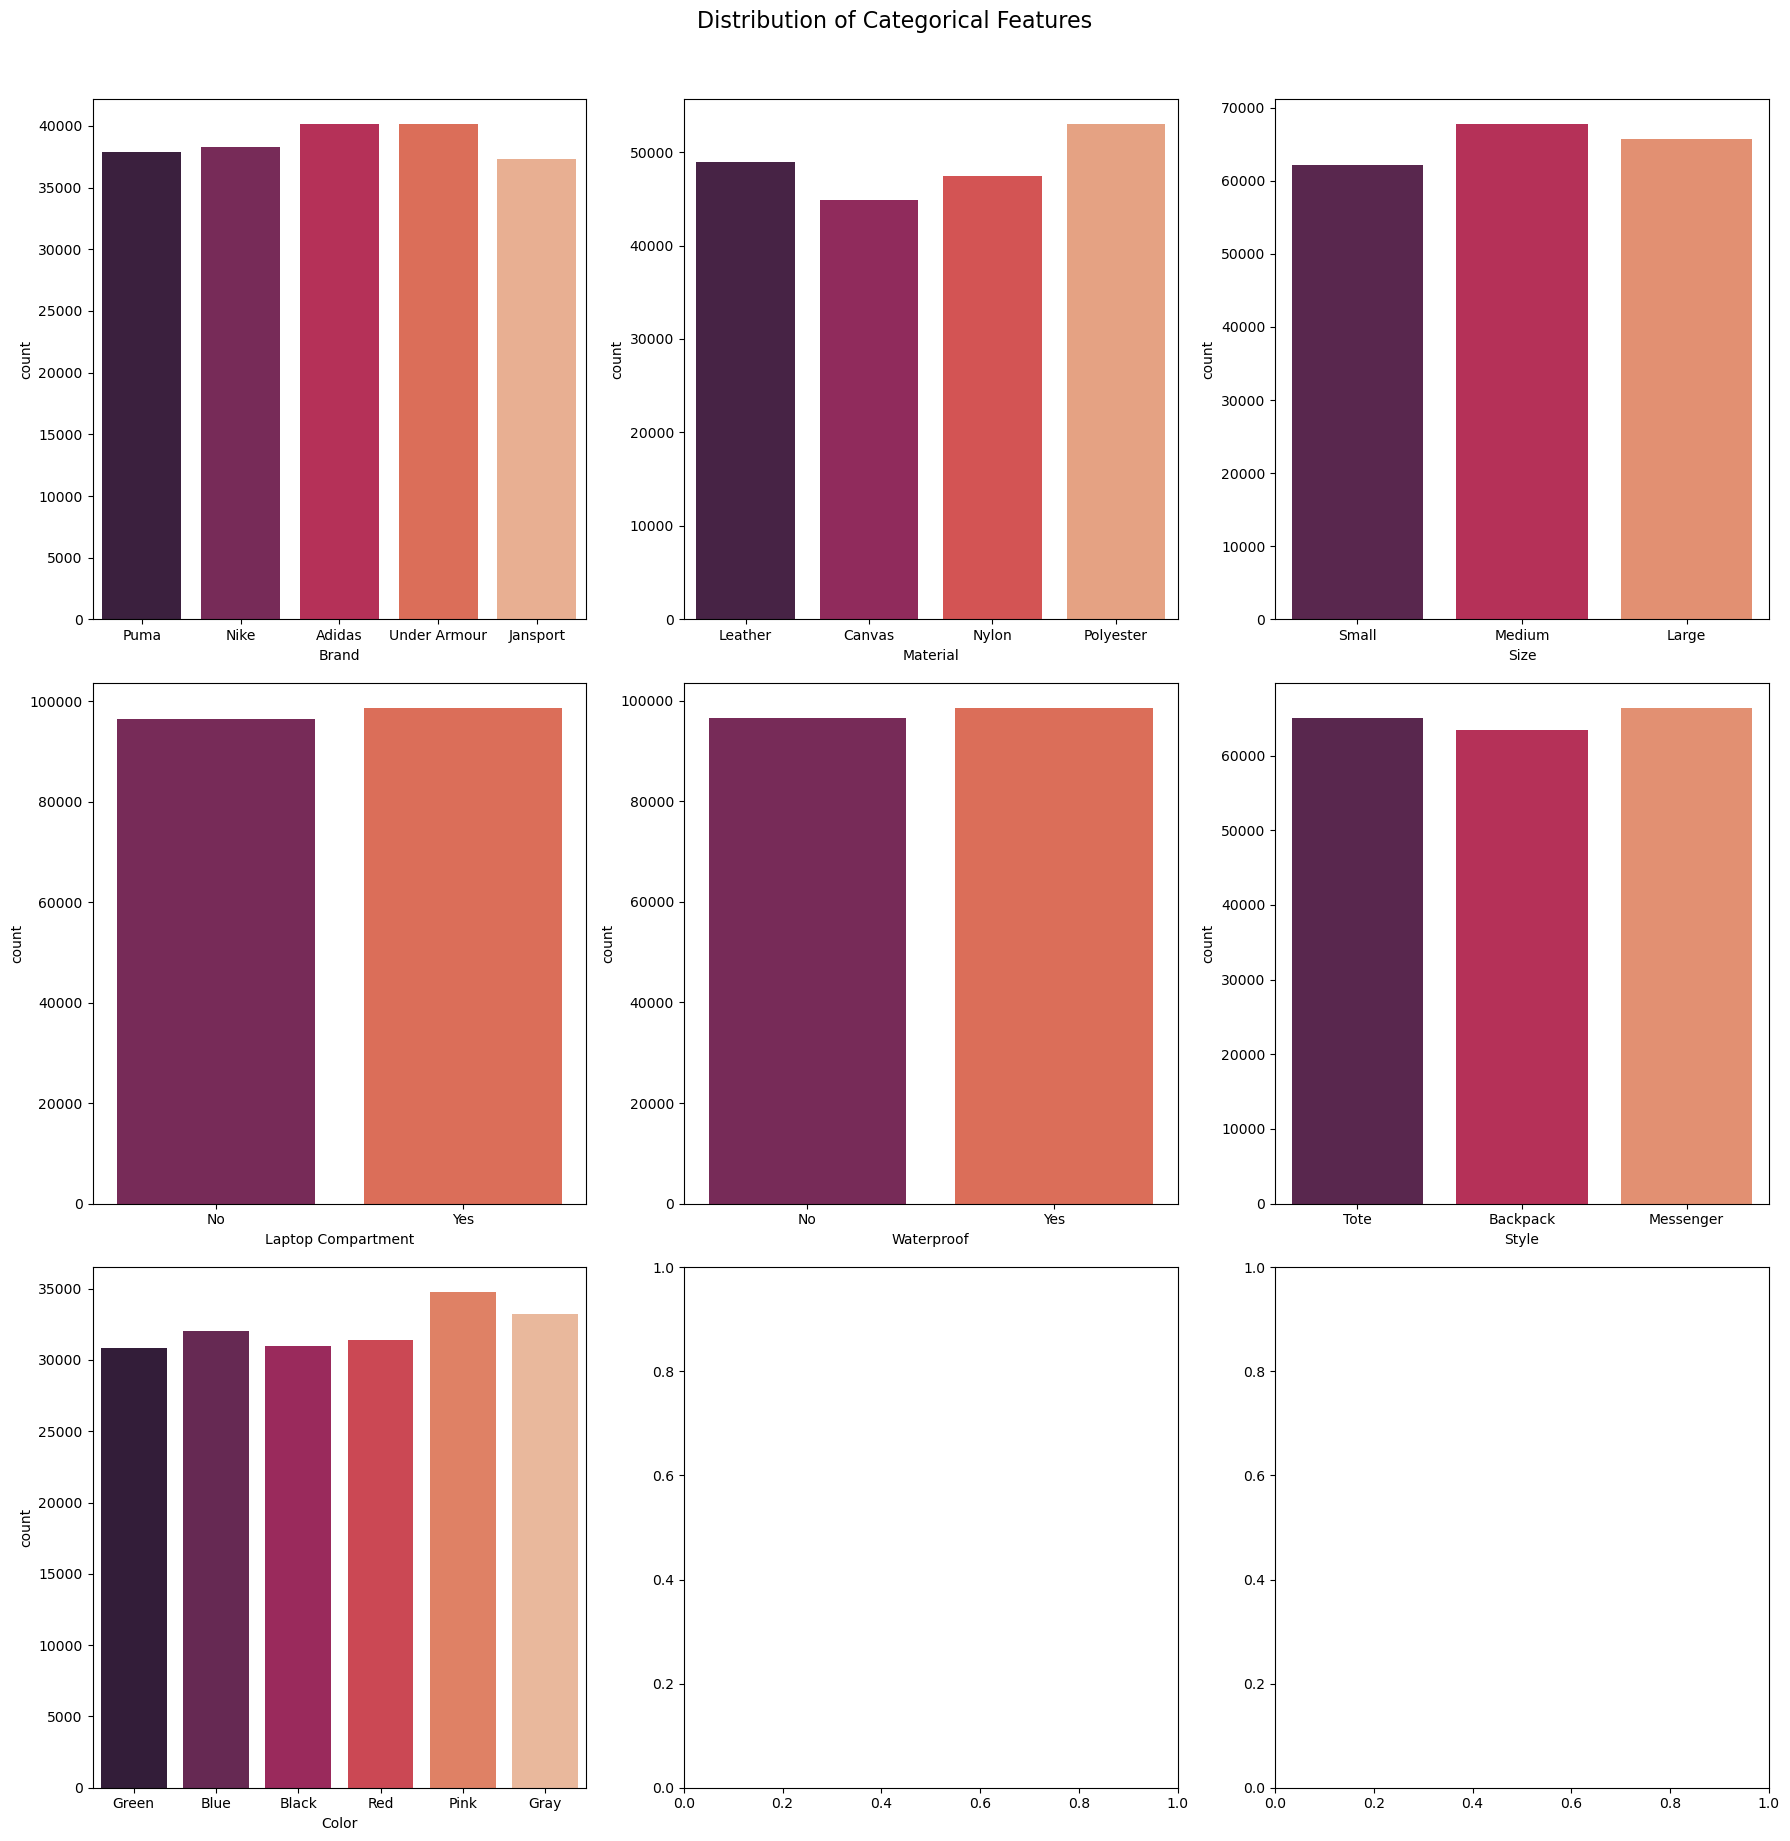

In [27]:
num_columns = ['Compartments', 'Weight Capacity (kg)', 'Price']
num_columns2 = ['Compartments', 'Weight Capacity (kg)']
cat_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
plot_distribution(train, num_columns, 'num')
# plot_distribution(training_extra, num_columns, 'num')
plot_distribution(test, num_columns2, 'num')

plot_distribution(train, cat_columns, 'cat')
# plot_distribution(training_extra, cat_columns, 'cat')
plot_distribution(test, cat_columns, 'cat')